# Eksperimen MSML - EkoAndriPrasetyo

Dataset raw: `creditscoring_raw/creditscoring_raw.csv`

Output preprocessing: `preprocessing/creditscoring_preprocessing/creditscoring_preprocessed.csv`

Notebook ini berisi:
1. Data Loading
2. EDA
3. Preprocessing (imputasi)
4. Save dataset preprocessed


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

RAW_PATH = Path('../creditscoring_raw/creditscoring_raw.csv')
OUT_PATH = Path('./creditscoring_preprocessing/creditscoring_preprocessed.csv')
print('RAW_PATH:', RAW_PATH)
print('Exists:', RAW_PATH.exists())


RAW_PATH: creditscoring_raw/creditscoring_raw.csv
Exists: True


## 1) Data Loading


In [2]:
df = pd.read_csv(RAW_PATH)
df.head()


,age,monthly_income,loan_amount,tenure_months,num_credit_lines,job_type,education_level,city,marital_status,has_previous_default,target
0,38,20260831,57014732,22,8.0,employee,high_school,Yogyakarta,married,0,1
1,60,31903885,38316806,42,0.0,employee,master,Jakarta,divorced,0,0
2,60,4849205,39483591,67,NaN,freelance,bachelor,Bekasi,single,0,0
3,36,18332229,49050971,6,6.0,employee,bachelor,Jakarta,divorced,0,1
4,59,19986355,20811004,45,4.0,civil_servant,master,Surabaya,married,1,0


## 2) EDA


In [3]:
df.info()
df.describe(include='all').T.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2000 non-null   int64  
 1   monthly_income        2000 non-null   int64  
 2   loan_amount           2000 non-null   int64  
 3   tenure_months         2000 non-null   int64  
 4   num_credit_lines      1956 non-null   float64
 5   job_type              1945 non-null   object 
 6   education_level       1907 non-null   object 
 7   city                  2000 non-null   object 
 8   marital_status        2000 non-null   object 
 9   has_previous_default  2000 non-null   int64  
 10  target                2000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 172.0+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2000.0,NaN,NaN,NaN,40.12,11.491328,21.0,30.0,40.0,50.0,60.0
monthly_income,2000.0,NaN,NaN,NaN,19175311.265,9051397.51283,3026908.0,11697738.5,19172180.5,26894667.5,34988022.0
loan_amount,2000.0,NaN,NaN,NaN,41165892.282,22790412.307755,1024698.0,21502354.75,42090824.5,60886527.0,79937348.0
tenure_months,2000.0,NaN,NaN,NaN,38.741,18.900781,6.0,23.0,38.0,55.0,72.0
num_credit_lines,1956.0,NaN,NaN,NaN,5.086401,3.172484,0.0,2.0,5.0,8.0,10.0
job_type,1945,4,civil_servant,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,1907,4,master,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2000,5,Surabaya,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,2000,3,divorced,688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_previous_default,2000.0,NaN,NaN,NaN,0.107,0.309191,0.0,0.0,0.0,0.0,1.0


In [4]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing>0]


,0
education_level,93
job_type,55
num_credit_lines,44


In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df['target'].value_counts(dropna=False)


,count
target,
0,1064
1,936


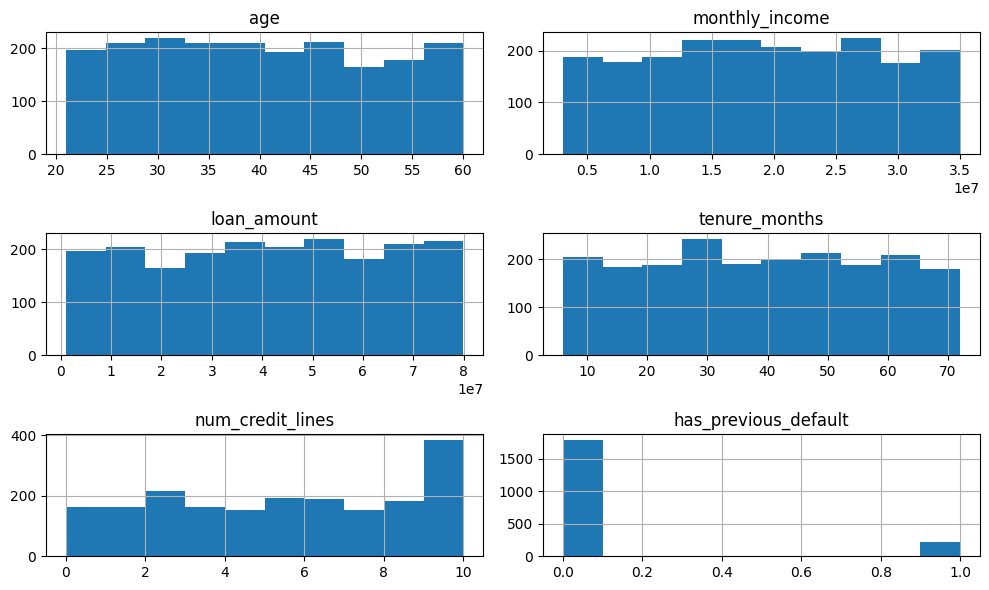

In [7]:
num_cols = ['age','monthly_income','loan_amount','tenure_months','num_credit_lines','has_previous_default']
cat_cols = ['job_type','education_level','city','marital_status']
df[num_cols].hist(figsize=(10,6))
plt.tight_layout(); plt.show()


## 3) Preprocessing

Imputasi:
- Numerik: median
- Kategorikal: most_frequent

One-hot encoding dilakukan di modelling (Pipeline), agar model bisa menerima input raw saat serving.


In [8]:
from sklearn.impute import SimpleImputer

out = df.copy()
out[num_cols] = SimpleImputer(strategy='median').fit_transform(out[num_cols])
out[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(out[cat_cols])
out['target'] = out['target'].astype(int)
for c in cat_cols:
    out[c] = out[c].astype(str)
out.head()


,age,monthly_income,loan_amount,tenure_months,num_credit_lines,job_type,education_level,city,marital_status,has_previous_default,target
0,38.0,20260831.0,57014732.0,22.0,8.0,employee,high_school,Yogyakarta,married,0.0,1
1,60.0,31903885.0,38316806.0,42.0,0.0,employee,master,Jakarta,divorced,0.0,0
2,60.0,4849205.0,39483591.0,67.0,5.0,freelance,bachelor,Bekasi,single,0.0,0
3,36.0,18332229.0,49050971.0,6.0,6.0,employee,bachelor,Jakarta,divorced,0.0,1
4,59.0,19986355.0,20811004.0,45.0,4.0,civil_servant,master,Surabaya,married,1.0,0


## 4) Save Dataset Preprocessed


In [14]:
OUT_PATH.parent.mkdir(parents=True, exist_ok=True)
out.to_csv(OUT_PATH, index=False)
print('Saved:', OUT_PATH, 'exists:', OUT_PATH.exists())


Saved: creditscoring_preprocessing/creditscoring_preprocessed.csv exists: True
